### IEOR242 Project CART Model

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc

#### Load train and test data and do pre-processing

In [3]:
path = os.getcwd()
train = pd.read_csv(path+"/rmp_train.csv")
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20131 entries, 0 to 20130
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GoodTeaching              20131 non-null  int64  
 1   Difficulty                20131 non-null  float64
 2   Credit                    20131 non-null  object 
 3   Attendance                20131 non-null  object 
 4   TakeAgain                 20131 non-null  object 
 5   Grade                     20131 non-null  object 
 6   Textbook                  20131 non-null  object 
 7   accessible_outside_class  20131 non-null  int64  
 8   amazing_lectures          20131 non-null  int64  
 9   beware_of_pop_quizzes     20131 non-null  int64  
 10  caring                    20131 non-null  int64  
 11  clear_grading_criteria    20131 non-null  int64  
 12  extra_credit              20131 non-null  int64  
 13  get_ready_to_read         20131 non-null  int64  
 14  gives_

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,1,3.0,Yes,Mandatory,Yes,A,Yes,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,4.0,Missing,Not,Missing,NotSure,No,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4.0,Yes,Mandatory,Yes,B,No,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,3.0,Yes,Mandatory,Yes,A,Yes,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [4]:
# Do Dummy encoding. 
train_enc = pd.get_dummies(train, drop_first = True)

In [5]:
test = pd.read_csv(path+"/rmp_test.csv")
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6711 entries, 0 to 6710
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GoodTeaching              6711 non-null   int64  
 1   Difficulty                6711 non-null   float64
 2   Credit                    6711 non-null   object 
 3   Attendance                6711 non-null   object 
 4   TakeAgain                 6711 non-null   object 
 5   Grade                     6711 non-null   object 
 6   Textbook                  6711 non-null   object 
 7   accessible_outside_class  6711 non-null   int64  
 8   amazing_lectures          6711 non-null   int64  
 9   beware_of_pop_quizzes     6711 non-null   int64  
 10  caring                    6711 non-null   int64  
 11  clear_grading_criteria    6711 non-null   int64  
 12  extra_credit              6711 non-null   int64  
 13  get_ready_to_read         6711 non-null   int64  
 14  gives_go

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,3.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,5.0,Missing,Not,Missing,B,Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,Yes,Mandatory,Yes,B,Yes,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [6]:
test_enc = pd.get_dummies(test, drop_first = True)
test_enc

,GoodTeaching,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,...,Grade_C,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_No,Textbook_Yes
0,0,4.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,0,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
6707,0,5.0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
6708,1,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
6709,1,3.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
# Baseline model
y_train = train_enc['GoodTeaching']
x_train = train_enc.drop(['GoodTeaching'], axis=1)
good = np.sum(y_train == 1)
notgood = np.sum(y_train == 0)
print(pd.Series({'0': notgood, '1': good}))
base_result = max(good, notgood)/(good + notgood)
print(f"Basic accuracy result: {base_result}")

0     7798
1    12333
dtype: int64
Basic accuracy result: 0.6126372261685957


In [8]:
y_test = test_enc['GoodTeaching']
x_test = test_enc.drop(['GoodTeaching'], axis=1)

#### Decision Tree Classifier

#### Use Cross-Validation to select the complexity parameter

In [9]:
# Exhaustive search over specified parameter values for an estimator.
grid_values = {'ccp_alpha': np.linspace(0.0, 0.001, 101),
               'min_samples_leaf': [5],
               'min_samples_split': [20],
               'max_depth': [30],
               'class_weight' : [{0: 1, 1: 20}],
               'random_state': [10]} 
            
dtc = DecisionTreeClassifier()
dtc_cv_acc = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10, verbose=1) 

dtc_cv_acc.fit(x_train, y_train)

Fitting 10 folds for each of 101 candidates, totalling 1010 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.0e+00, 1.0e-05, 2.0e-05, 3.0e-05, 4.0e-05, 5.0e-05, 6.0e-05,
       7.0e-05, 8.0e-05, 9.0e-05, 1.0e-04, 1.1e-04, 1.2e-04, 1.3e-04,
       1.4e-04, 1.5e-04, 1.6e-04, 1.7e-04, 1.8e-04, 1.9e-04, 2.0e-04,
       2.1e-04, 2.2e-04, 2.3e-04, 2.4e-04, 2.5e-04, 2.6e-04, 2.7e-04,
       2.8e-04, 2.9e-04, 3.0e-04, 3.1e-04, 3.2e-04, 3...
       7.0e-04, 7.1e-04, 7.2e-04, 7.3e-04, 7.4e-04, 7.5e-04, 7.6e-04,
       7.7e-04, 7.8e-04, 7.9e-04, 8.0e-04, 8.1e-04, 8.2e-04, 8.3e-04,
       8.4e-04, 8.5e-04, 8.6e-04, 8.7e-04, 8.8e-04, 8.9e-04, 9.0e-04,
       9.1e-04, 9.2e-04, 9.3e-04, 9.4e-04, 9.5e-04, 9.6e-04, 9.7e-04,
       9.8e-04, 9.9e-04, 1.0e-03]),
                         'class_weight': [{0: 1, 1: 20}], 'max_depth': [30],
                         'min_samples_leaf': [5], 'min_samples_split': [20],
                         'random_state': [10]},
             scoring='accuracy', verbose=1)

In [10]:
acc = dtc_cv_acc.cv_results_['mean_test_score'] 
ccp = dtc_cv_acc.cv_results_['param_ccp_alpha'].data

pd.DataFrame({'ccp alpha' : ccp, 'Validation Accuracy': acc}).head(20)

,ccp alpha,Validation Accuracy
0,0.0,0.733595
1,0.00001,0.733396
2,0.00002,0.731012
3,0.00003,0.724008
4,0.00004,0.714967
5,0.00005,0.706075
6,0.00006,0.697829
7,0.00007,0.692365
8,0.00008,0.686503
9,0.00009,0.688739


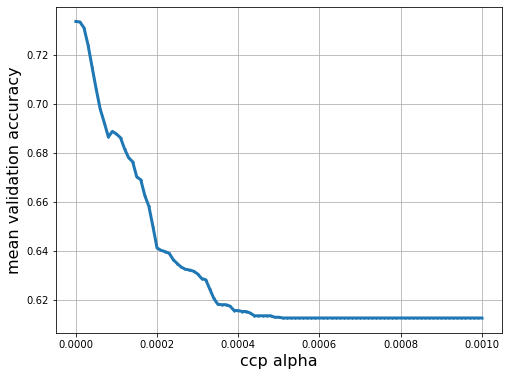

In [11]:
plt.figure(figsize=(8, 6))
plt.xlabel('ccp alpha', fontsize=16)
plt.ylabel('mean validation accuracy', fontsize=16)
plt.scatter(ccp, acc, s=2)
plt.plot(ccp, acc, linewidth=3)
plt.grid(True, which='both')
plt.show()

In [12]:
print('Grid best parameter (max. Accuracy): ', dtc_cv_acc.best_params_)
print('Grid best score (Accuracy): ', dtc_cv_acc.best_score_)

print('Node count =', dtc_cv_acc.best_estimator_.tree_.node_count)

Grid best parameter (max. Accuracy):  {'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 20}, 'max_depth': 30, 'min_samples_leaf': 5, 'min_samples_split': 20, 'random_state': 10}
Grid best score (Accuracy):  0.7335951617366956
Node count = 2455


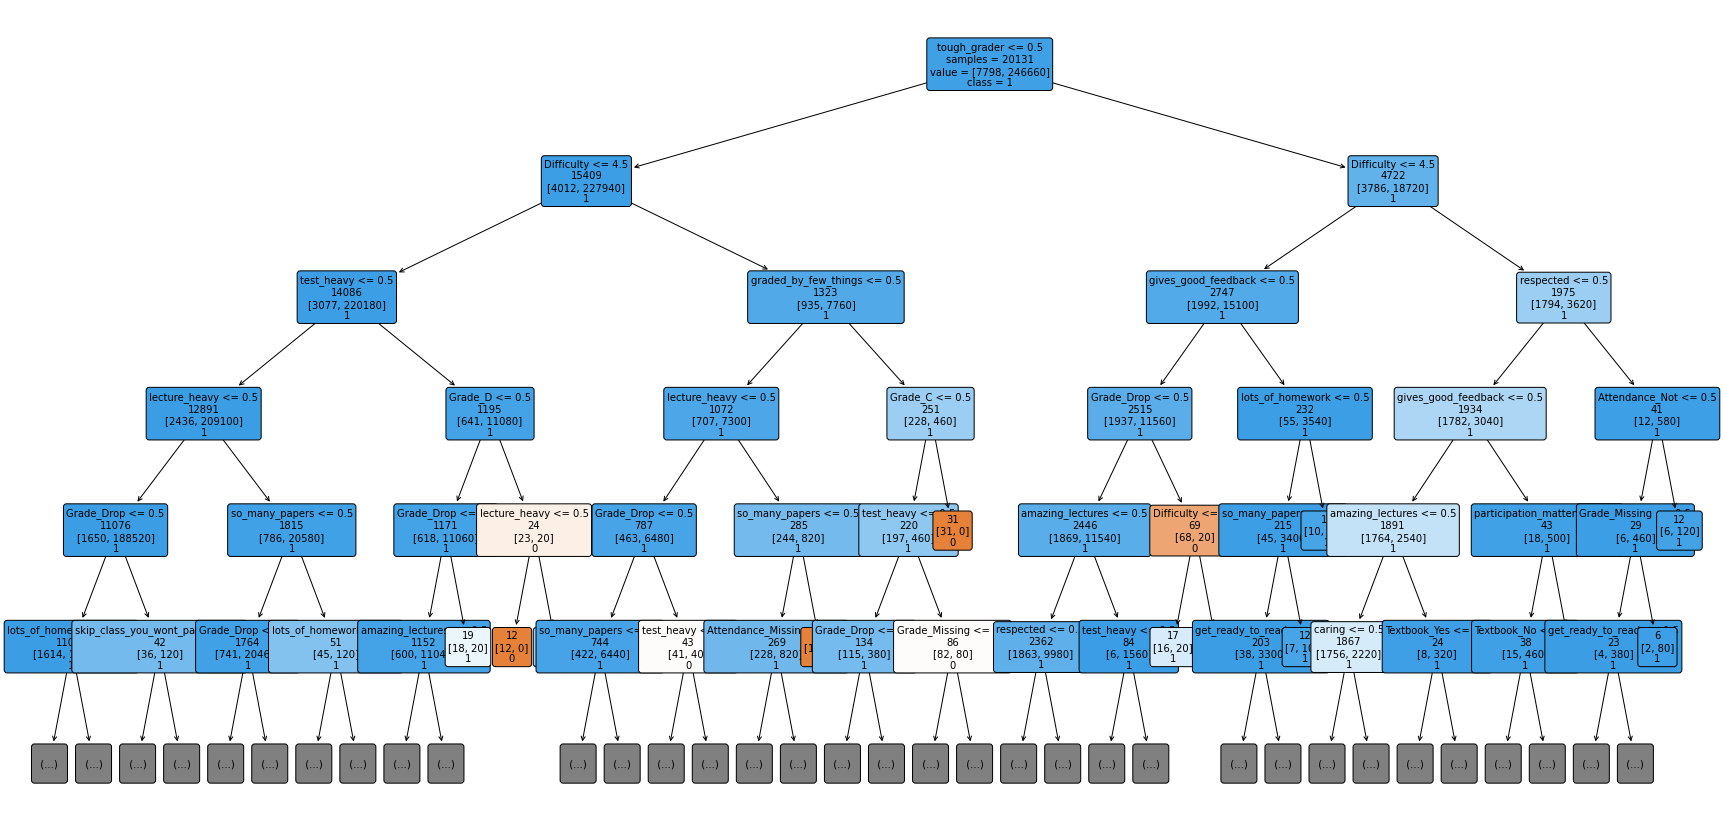

In [13]:
plt.figure(figsize=(30,15))
plot_tree(dtc_cv_acc.best_estimator_, 
          feature_names=x_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          rounded=True,
          fontsize=10,
          max_depth = 5,
          label='root')
plt.show()

In [14]:
y_pred = dtc_cv_acc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[ 898 1701]
 [  83 4029]]


#### Use Bootstrap to evaluate the final model

In [15]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=5000, random_state=10):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label,train_label)
    output_df = pd.DataFrame(output_array)
    return output_df

#### Accuracy, TPR, FPR

In [16]:
def ACC(predictions, y_test, y_train):
    correct_pred = np.sum(y_test == predictions)
    acc = correct_pred/len(y_test)
    return acc

In [17]:
def TPR(predictions, y_test, y_train): # TPR = TP/(TP+FN)
    TP = np.sum(np.logical_and(y_test == 1, predictions == 1))
    FN = np.sum(np.logical_and(y_test == 1, predictions == 0))
    tpr = TP/(TP+FN)
    return tpr

In [18]:
def FPR(predictions, y_test, y_train): # FPR = FP/(FP+TN)
    FP = np.sum(np.logical_and(y_test == 0, predictions == 1))
    TN = np.sum(np.logical_and(y_test == 0, predictions == 0))
    fpr = FP/(FP+TN)
    return fpr

In [19]:
bs_output = bootstrap_validation(x_test,y_test,y_train,dtc_cv_acc,
                                 metrics_list=[ACC, TPR, FPR],
                                 sample = 500)

(500, 3)


In [20]:
bs_output = bs_output.rename(columns={0: "ACC", 1: "TPR", 2: "FPR"})
bs_output

,ACC,TPR,FPR
0,0.726866,0.979830,0.674114
1,0.731337,0.976925,0.658443
2,0.731635,0.979449,0.666408
3,0.736254,0.980895,0.656444
4,0.734019,0.979495,0.675010
...,...,...,...
495,0.737446,0.980473,0.655872
496,0.739681,0.981620,0.648680
497,0.723737,0.977534,0.673547
498,0.731635,0.979182,0.652968


In [21]:
ACC_mean = np.mean(bs_output['ACC'])
ACC_variance = np.var(bs_output['ACC'])
ACC_CI = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
print('Mean of ACC: ', ACC_mean)
print('Variance of ACC', ACC_variance)
print('95% Confidence Interval of ACC', ACC_CI)

Mean of ACC:  0.7343370585605706
Variance of ACC 2.827672295728716e-05
95% Confidence Interval of ACC [0.72433318 0.74452764]


In [22]:
TPR_mean = np.mean(bs_output['TPR'])
TPR_variance = np.var(bs_output['TPR'])
TPR_CI = np.quantile(bs_output.iloc[:,1],np.array([0.025,0.975]))
print('Mean of TPR: ', TPR_mean)
print('Variance of TPR', TPR_variance)
print('95% Confidence Interval of TPR', TPR_CI)

Mean of TPR:  0.9797306731967267
Variance of TPR 4.778412124236041e-06
95% Confidence Interval of TPR [0.97562888 0.98388413]


In [23]:
FPR_mean = np.mean(bs_output['FPR'])
FPR_variance = np.var(bs_output['FPR'])
FPR_CI = np.quantile(bs_output.iloc[:,2],np.array([0.025,0.975]))
print('Mean of FPR: ', FPR_mean)
print('Variance of FPR', FPR_variance)
print('95% Confidence Interval of FPR', FPR_CI)

Mean of FPR:  0.6545177252134048
Variance of FPR 8.922223300773424e-05
95% Confidence Interval of FPR [0.63655216 0.67451884]


#### Feature Importance

In [35]:
df = pd.DataFrame({'Feature' : x_train.columns, 
              'Importance_score': 100*dtc_cv_acc.best_estimator_.feature_importances_}).round(1)

In [36]:
df = df.sort_values(by='Importance_score', ascending=False)
df

,Feature,Importance_score
20,tough_grader,13.4
0,Difficulty,10.9
23,Attendance_Not,4.2
19,test_heavy,3.8
17,skip_class_you_wont_pass,3.8
13,lecture_heavy,3.8
29,Grade_Drop,3.7
14,lots_of_homework,3.7
8,gives_good_feedback,3.7
9,graded_by_few_things,3.5


In [40]:
len(df)

37

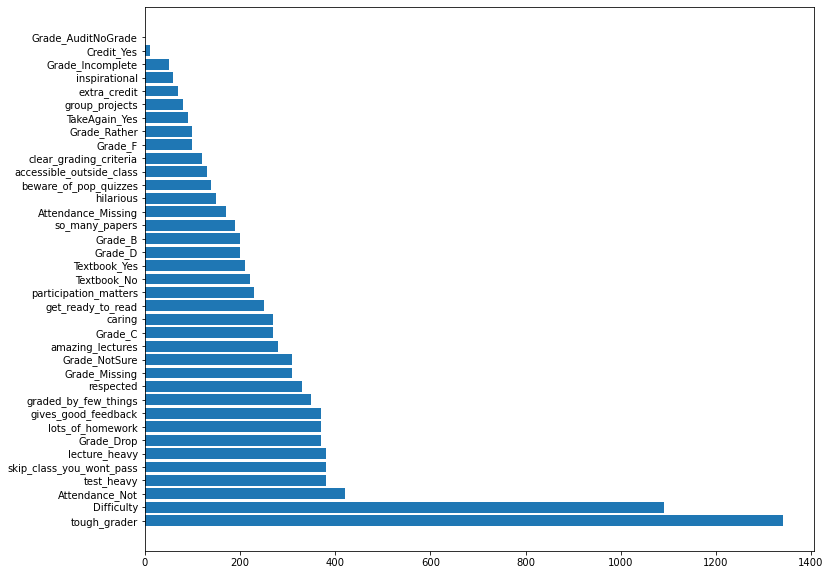

In [38]:
plt.figure(figsize=(12,10))
plt.barh(df.Feature, 100*df.Importance_score)
plt.show()

#### Most important features: tough_grader and Difficulty